In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
import datetime
import scipy
import matplotlib.dates as mdates

In [33]:
filename = '/Users/owner/Desktop/exampleflare.mat'
dat = sio.loadmat(filename)

In [34]:
irrev = dat['irrev']
timeev = dat['timeev']
sqev = dat['sqev']

In [35]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

In [36]:
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.

    Parameters
    ----------
    datenum : float
        Datenum value.

    Returns
    -------
    ret : datetime
        Converted datetime value.

    """
    days = datenum % 1
    ret = datetime.datetime.fromordinal(int(datenum)) + \
        datetime.timedelta(days=days) - datetime.timedelta(days=366)

    return ret

In [37]:
irrev_dt=[]
for i in range(len(timeev)):
    irrev_dt.append(datenum_to_datetime(float(timeev[i])))

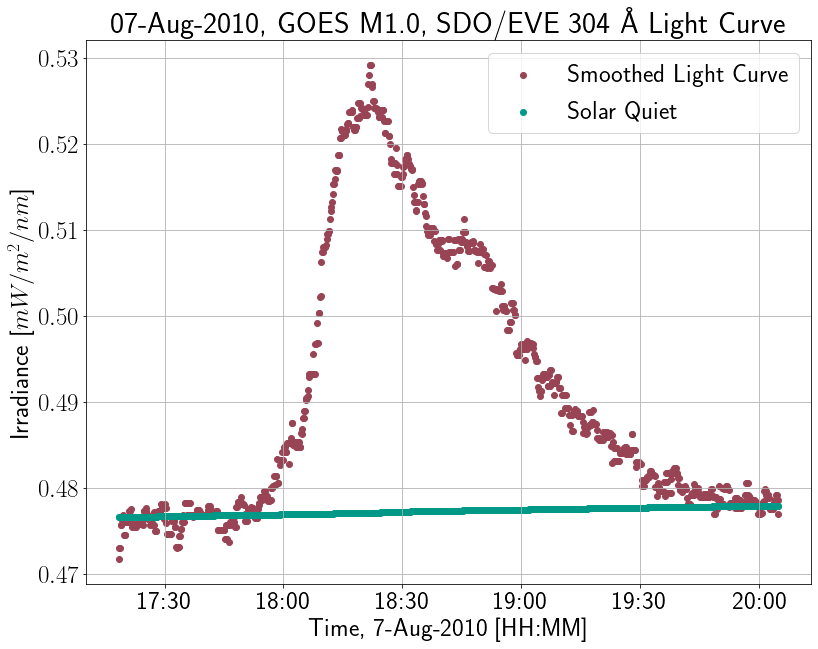

In [85]:
fig,ax = plt.subplots(figsize=(13,10))
ax.scatter(irrev_dt[500:1500],scipy.signal.medfilt(irrev[500:1500,0]/1e-3,kernel_size=7),color='#994455',label='Smoothed Light Curve')
ax.scatter(irrev_dt[500:1500],sqev[500:1500]/1e-3,color='#009988',label='Solar Quiet')
ax.set_ylabel(r'Irradiance [$mW/m^2/nm$]',font='Tahoma',fontsize=25)
ax.set_xlabel(r'Time, 7-Aug-2010 [HH:MM]',font='Tahoma',fontsize=25)
ax.set_title(r'07-Aug-2010, GOES M1.0, SDO/EVE 304 \AA\ Light Curve',font='Tahoma',fontsize=30,fontweight='bold')
ax.grid()
ax.tick_params(axis='both',which='major',labelsize=25)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.legend(fontsize=25)
